# Access to Primary Healthcare in Nairobi

## Introduction

Sustainable Development Goal (SDG) 3 aims to “ensure healthy lives and promote well-being for all at all ages.” A key pillar of this is Target 3.8, which focuses on achieving Universal Health Coverage (UHC) — ensuring that all people have access to needed health services without financial hardship.

In line with this, Kenya has committed to UHC, and one of the indicators according to a report is to increase health facility density (HFD), especially at primary care level (Level 2 and 3), which forms the foundation for equitable and cost-effective service delivery.

Yet, as of 2018, Kenya’s national average HFD stood at 2.3 per 10,000 people, with wide disparities across counties.

Achieving better primary care access in Nairobi requires strategic resource allocation — prioritizing underserved areas and reducing affordability barriers. This demands data-driven insights into:
	•	Where physical access is lacking, and
	•	Where affordability blocks access despite facility presence.

This notebook presents Phase 1 of our healthcare access gap analysis, focused on primary healthcare services.

We define access using two key dimensions:
	1.	Availability: Are there enough facilities relative to population?
	2.	Affordability: Is access financially realistic for low-income populations?
    
This analysis supports SDG 3 and national UHC goals by identifying where investment — either in new facilities, partnerships, or affordability measures — can make the greatest impact.

**Assumptions made:**
- “Other” level facilities assumed to be non-clinical (e.g., admin, training) and excluded.
- Public facilities infered to be more affordable and accessible to all.
- All facilities assumed to be publicly accessible unless marked non-operational.
- Population data assumed constant across survey years.

## Importing required libraries

We begin by importing the essential Python libraries needed for data handling (pandas, numpy) and visualizations (matplotlib, seaborn). We also suppress warnings to keep our output clean.

In [269]:
# Import data handling and analysis libraries
import pandas as pd  
import numpy as np  

# Import visualization libraries
import matplotlib.pyplot as plt  
import seaborn as sns            

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

## Data loading & initial view: Health facilities

In this section, we load the healthcare facilities dataset provided in Excel format. The dataset contains records of health facilities across Kenya, and we will be narrowing our focus to Nairobi County as specified in the case study brief.

Let’s take a quick look at the first few rows to understand its structure and spot any initial issues.

In [162]:
# Load the health facilities dataset
df_health = pd.read_excel("healthcare_data.xls")

# Display the first few rows to understand structure
df_health.head()

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,Facility Code,Facility Name,Province,County,District,Division,Type,Owner,Location,Sub Location,...,IPD,OPD,OUTREACH,PMTCT,RAD/XRAY,RHTC/RHDC,TB DIAG,TB LABS,TB TREAT,YOUTH
0,19224,CDF Kiriari Dispensary,Eastern,Embu,Manyatta,Manyatta,Dispensary,Ministry of Health,Ruguru,Ruguru,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19310,St Jude's Huruma Community Health Services,Nairobi,Nairobi,Mathare,Huruma,Medical Clinic,Private Practice - Unspecified,Huruma,Huruma,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,14180,10 Engineer VCT,Rift Valley,Laikipia,Laikipia East,Central,Dispensary,Armed Forces,Nanyuki,Majengo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,17486,12 Engineers,Central,Kiambu,Thika West,NaN,Dispensary,Ministry of Health,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18393,3Kl Maternity & Nursing Home,Rift Valley,Kajiado,Kajiado North,Ongata Rongai,Nursing Home,Private Practice - Clinical Officer,Gataka,Gataka,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data overview

The dataset originally contains `50 columns` describing various attributes of health facilities:

- **Facility Identifiers:** Unique codes and naming conventions
- Location & Administration: Geographic and political location of the facility
- **Ownership & Type:** Whether a facility is public or private and its classification
- **Operational Status:** Whether the facility is open on weekends, nights, or holidays
- **Contact & Communication:** Contact details of the in-charge personnel
- **Service Availability:** Binary indicators showing availability of key services like maternal care, immunization, TB, etc.
- **Infrastructure & Capacity:** Number of beds and cots as indicators of scale

In [270]:
df_health.columns

Index(['Facility Code', 'Facility Name', 'Province', 'County', 'District',
       'Division', 'Type', 'Owner', 'Location', 'Sub Location',
       'Description of Location', 'Constituency', 'Nearest Town', 'Beds',
       'Cots', 'Official Landline', 'Official Fax', 'Official Mobile',
       'Official Email', 'Official Address', 'Official Alternate No', 'Town',
       'Post Code', 'In Charge', 'Job Title of in Charge', 'Open 24 Hours',
       'Open Weekends', 'Operational Status', 'ANC', 'ART', 'BEOC', 'BLOOD',
       'CAES SEC', 'CEOC', 'C-IMCI', 'EPI', 'FP', 'GROWM', 'HBC', 'HCT', 'IPD',
       'OPD', 'OUTREACH', 'PMTCT', 'RAD/XRAY', 'RHTC/RHDC', 'TB DIAG',
       'TB LABS', 'TB TREAT', 'YOUTH'],
      dtype='object')

### Filtering for Nairobi-related records

The original dataset covers health facilities from all counties across Kenya. However, our analysis is focused specifically on healthcare access in Nairobi County.

To achieve this, we subset the data to only include facilities located in Nairobi.

In [271]:
# Filter dataset to include only records where the province is Nairobi
df_nairobi = df_health[df_health['Province'] == "Nairobi"]

# Preview the resulting subset
df_nairobi.head()

,Facility Code,Facility Name,Province,County,District,Division,Type,Owner,Location,Sub Location,...,IPD,OPD,OUTREACH,PMTCT,RAD/XRAY,RHTC/RHDC,TB DIAG,TB LABS,TB TREAT,YOUTH
1,19310,St Jude's Huruma Community Health Services,Nairobi,Nairobi,Mathare,Huruma,Medical Clinic,Private Practice - Unspecified,Huruma,Huruma,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,13043,7Kr Mrs Health Centre,Nairobi,Nairobi,Langata,Lang'ata,Health Centre,Armed Forces,Mugumoini,Mugumoini,...,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,20346,AAR Adams Health Centre,Nairobi,Nairobi,Kibra,Woodly,Medical Clinic,Private Practice - General Practitioner,Woodly,Woodly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,12861,AAR City Centre Clinic,Nairobi,Nairobi,Starehe,Starehe,Medical Clinic,Private Enterprise (Institution),Central Business District,NaN,...,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,16796,AAR Clinic Sarit Centre (Westlands),Nairobi,Nairobi,Westlands,Parklands,Medical Clinic,Private Enterprise (Institution),Parklands,Upper Parklands,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's check the number of rows (records) and columns (features) in the Nairobi dataset:

In [272]:
# Check the number of rows and columns in the Nairobi dataset
df_nairobi.shape

(942, 50)

- We have `942` health facilities recorded in Nairobi according to the dataset.
- The number of features remains at `50`, consistent with the original dataset.

In the next step, we’ll assess which columns are relevant for our analysis and begin cleaning the dataset to ensure quality and usability.

## Data Cleaning: Nairobi Health Facilities Dataset

In this section, we clean and prepare the Nairobi subset of the dataset for analysis.

The goal is to retain only the most relevant features for our healthcare access questions while eliminating redundant or non-informative columns.

### Drop "County" and "Province" columns

The dataset contains ‘County’ and ‘Province’ columns, both of which indicate location. However:

1. The dataset represents only one County, `Nairobi`, so the County column adds no value and can be dropped.
    
2. The Province column is also redundant — it refers to the same administrative level as County, based on older naming conventions used before county governments were established.

In [273]:
# Drop County and Province columns as they add no value for Nairobi-only dataset
df_nairobi.drop(columns=["County", "Province"], inplace=True)

# Preview the updated DataFrame
df_nairobi.head(2)

,Facility Code,Facility Name,District,Division,Type,Owner,Location,Sub Location,Description of Location,Constituency,...,IPD,OPD,OUTREACH,PMTCT,RAD/XRAY,RHTC/RHDC,TB DIAG,TB LABS,TB TREAT,YOUTH
1,19310,St Jude's Huruma Community Health Services,Mathare,Huruma,Medical Clinic,Private Practice - Unspecified,Huruma,Huruma,Situated near Ndururumo Primary School (Juja R...,MATHARE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,13043,7Kr Mrs Health Centre,Langata,Lang'ata,Health Centre,Armed Forces,Mugumoini,Mugumoini,"Next to Nairobi Opharnage,Off Lang'ata rd.",LANG'ATA,...,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Drop Administrative and Contact-Related Columns

The dataset includes several columns related to facility contact information (phone numbers, email addresses, postal addresses) and administrative information.

While useful in other contexts, they do not contribute to our current focus on healthcare access and facility availability, and are therefore dropped.

In [274]:
# Drop administrative and contact columns irrelevant to our analysis
df_nairobi.drop(columns=[
    'Description of Location', 'Nearest Town', 'Official Landline', 'Official Fax', 
    'Official Mobile', 'Official Email', 'Official Address', 'Official Alternate No', 
    'Town', 'Post Code', 'In Charge', 'Job Title of in Charge'
], inplace=True)

# Preview after dropping
df_nairobi.head(2)

,Facility Code,Facility Name,District,Division,Type,Owner,Location,Sub Location,Constituency,Beds,...,IPD,OPD,OUTREACH,PMTCT,RAD/XRAY,RHTC/RHDC,TB DIAG,TB LABS,TB TREAT,YOUTH
1,19310,St Jude's Huruma Community Health Services,Mathare,Huruma,Medical Clinic,Private Practice - Unspecified,Huruma,Huruma,MATHARE,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,13043,7Kr Mrs Health Centre,Langata,Lang'ata,Health Centre,Armed Forces,Mugumoini,Mugumoini,LANG'ATA,14.0,...,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Rename “District” to “Sub County”

The dataset uses ‘District’ to refer to geographic areas within Nairobi, but the current administrative naming convention uses ‘Sub County’.
We rename this column for consistency and clarity throughout the analysis.

In [275]:
# Rename 'District' to 'Sub County' to match current administrative terminology
df_nairobi.rename(columns={'District': 'Sub County'}, inplace=True)

# Preview to confirm renaming
df_nairobi.head(2)

,Facility Code,Facility Name,Sub County,Division,Type,Owner,Location,Sub Location,Constituency,Beds,...,IPD,OPD,OUTREACH,PMTCT,RAD/XRAY,RHTC/RHDC,TB DIAG,TB LABS,TB TREAT,YOUTH
1,19310,St Jude's Huruma Community Health Services,Mathare,Huruma,Medical Clinic,Private Practice - Unspecified,Huruma,Huruma,MATHARE,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,13043,7Kr Mrs Health Centre,Langata,Lang'ata,Health Centre,Armed Forces,Mugumoini,Mugumoini,LANG'ATA,14.0,...,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Checking Data Types and Missing Values

For the remaining columns, let's review their quality by checking column data types and identifying missing values that could impact our analysis.

We begin with a `.info()` summary to check data types and the presence of missing values.

In [276]:
# Check column data types and count of non-null values
df_nairobi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 942 entries, 1 to 10496
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Facility Code       942 non-null    int64  
 1   Facility Name       942 non-null    object 
 2   Sub County          942 non-null    object 
 3   Division            914 non-null    object 
 4   Type                942 non-null    object 
 5   Owner               942 non-null    object 
 6   Location            894 non-null    object 
 7   Sub Location        672 non-null    object 
 8   Constituency        942 non-null    object 
 9   Beds                942 non-null    float64
 10  Cots                942 non-null    float64
 11  Open 24 Hours       931 non-null    object 
 12  Open Weekends       933 non-null    object 
 13  Operational Status  942 non-null    object 
 14  ANC                 0 non-null      float64
 15  ART                 109 non-null    object 
 16  BEOC       

**Observations:**
- We currently have `942` facilities and `36` columns.
- Most variables are of appropriate type (int64, object), except for Beds and Cots which are represented as floats — they should be integers since they are discrete features.
- Several columns toward the bottom of the list show 100% missing values, which limits their usefulness.

#### Convert Beds and Cots to Integer

Since Beds and Cots are count variables, they should be stored as int rather than float.

In [277]:
# Convert bed and cot counts to integer type
df_nairobi['Beds'] = df_nairobi['Beds'].astype(int)
df_nairobi['Cots'] = df_nairobi['Cots'].astype(int)

#### Missing Value Overview

As mentioned before, we do have several columns with missing values. To get a better overview, we calculate the percentage of missing values per column.

In [278]:
# Calculate % of missing values in each column
missing_percent = df_nairobi.isnull().mean() * 100
print(missing_percent.sort_values(ascending=False))

CAES SEC              100.000000
BEOC                  100.000000
TB TREAT              100.000000
TB LABS               100.000000
TB DIAG               100.000000
RHTC/RHDC             100.000000
RAD/XRAY              100.000000
PMTCT                 100.000000
OUTREACH              100.000000
OPD                   100.000000
HCT                   100.000000
GROWM                 100.000000
EPI                   100.000000
CEOC                  100.000000
BLOOD                 100.000000
YOUTH                 100.000000
ANC                   100.000000
C-IMCI                 92.356688
ART                    88.428875
HBC                    73.460722
FP                     70.276008
IPD                    68.471338
Sub Location           28.662420
Location                5.095541
Division                2.972399
Open 24 Hours           1.167728
Open Weekends           0.955414
Operational Status      0.000000
Cots                    0.000000
Facility Name           0.000000
Beds      

**Observation:**

- A few missing values in some of the location and operational metadata columns such as Sub Location, Location, and Open 24 Hours. These can be filled in later through research, but are not critical for the current round of analysis.
- Columns indicating specific services offered (e.g., ANC, ART, TB DIAG, YOUTH) have very high levels of missingness, including several that are 100% empty.

#### Drop Service Availability Columns

Columns indicating specific services offered (e.g., ANC, ART, TB DIAG) were excluded from this round of analysis due to significant missingness (>60%), including several with 100% missing values.

Given our current focus on access and facility density, these fields do not currently provide actionable insights. Furthermore, the reliability of these entries is unclear, and additional investigation is needed to determine:
	•	Whether these columns reflect actual absence of services, or
	•	Gaps in reporting and data entry.

In [279]:
# Drop columns on indicating service availability
df_nairobi.drop(columns = ['ANC', 'ART', 'BEOC', 'BLOOD',
       'CAES SEC', 'CEOC', 'C-IMCI', 'EPI', 'FP', 'GROWM', 'HBC', 'HCT', 'IPD',
       'OPD', 'OUTREACH', 'PMTCT', 'RAD/XRAY', 'RHTC/RHDC', 'TB DIAG',
       'TB LABS', 'TB TREAT', 'YOUTH'], inplace = True)
df_nairobi.head(2)

,Facility Code,Facility Name,Sub County,Division,Type,Owner,Location,Sub Location,Constituency,Beds,Cots,Open 24 Hours,Open Weekends,Operational Status
1,19310,St Jude's Huruma Community Health Services,Mathare,Huruma,Medical Clinic,Private Practice - Unspecified,Huruma,Huruma,MATHARE,0,0,N,Y,Operational
7,13043,7Kr Mrs Health Centre,Langata,Lang'ata,Health Centre,Armed Forces,Mugumoini,Mugumoini,LANG'ATA,14,0,Y,Y,Operational


**Verdict:**
- Leave these service-related columns out of this round of analysis.
- The more granular location data (e.g., Sub Location) may be enriched later through external sources on a need basis.
- For now, we continue with a focus on facility type, ownership, operational status, and subcounty level availability.

### Adding Ownership and Facility Level Labels

#### Public vs. Private Categorization

To facilitate clearer comparison across facility types, we added a new column that broadly categorizes facilities as either Public or Private, based on the existing 'Owner' field.

First, we examined the unique values in the Owner column:

In [173]:
df_nairobi["Owner"].unique()

array(['Private Practice - Unspecified', 'Armed Forces',
       'Private Practice - General Practitioner',
       'Private Enterprise (Institution)',
       'Private Practice - Medical Specialist',
       'Private Practice - Nurse / Midwife',
       'Non-Governmental Organizations',
       'Kenya Episcopal Conference-Catholic Secretariat',
       'Academic (if registered)', 'Local Authority',
       'Ministry of Health', 'Parastatal', 'Other Faith Based',
       'Private Practice - Clinical Officer', 'Community',
       'Other Public Institution', 'Company Medical Service',
       'Humanitarian Agencies', 'Christian Health Association of Kenya',
       'State Coorporation', 'Supreme Council for Kenya Muslims'],
      dtype=object)

This revealed a diverse range of ownership types, including government bodies, private practices, NGOs, religious organizations, and others.

We grouped the ownership types as follows:
- **Public:** 'Ministry of Health', 'Local Authority', 'Parastatal', 'Other Public Institution', 'State Coorporation', 'Armed Forces'
- **Private:** All remaining types, including private practice, NGO, academic, and faith-based entities.

We then created a new column using this mapping:

In [280]:
# Define list of public facilities
public = ['Ministry of Health', 'Local Authority', 'Parastatal', 'Other Public Institution', 'State Coorporation', 'Armed Forces']

# Create a new column called 'Ownership label' that assigns either 'Public' or 'Private' 
# depending on whether the owner is in the 'public' list
df_nairobi['Ownership label'] = df_nairobi['Owner'].apply(lambda x: 'Public' if x in public else 'Private')

# Preview
df_nairobi.head(2)

,Facility Code,Facility Name,Sub County,Division,Type,Owner,Location,Sub Location,Constituency,Beds,Cots,Open 24 Hours,Open Weekends,Operational Status,Ownership label
1,19310,St Jude's Huruma Community Health Services,Mathare,Huruma,Medical Clinic,Private Practice - Unspecified,Huruma,Huruma,MATHARE,0,0,N,Y,Operational,Private
7,13043,7Kr Mrs Health Centre,Langata,Lang'ata,Health Centre,Armed Forces,Mugumoini,Mugumoini,LANG'ATA,14,0,Y,Y,Operational,Public


This binary classification enables us to assess public-private distribution of facilities within Nairobi’s health system.

#### Facility Level Classification

To better understand the role and capacity of each health facility, we introduced a classification approach for facility level, based on the existing 'Type' column.

We began by inspecting the unique values:

In [175]:
df_nairobi["Type"].unique()

array(['Medical Clinic', 'Health Centre', 'Nursing Home', 'Dispensary',
       'Dental Clinic', 'Other Hospital', 'VCT Centre (Stand-Alone)',
       'Medical Centre', 'Maternity Home', 'District Hospital',
       'Health Project', 'Training Institution in Health (Stand-alone)',
       'National Referral Hospital', 'Laboratory (Stand-alone)',
       'Health Programme', 'District Health Office', 'Eye Clinic',
       'Eye Centre', 'Radiology Unit', 'Sub-District Hospital'],
      dtype=object)

We then mapped these into functional tiers based on research on the Kenyan health system and our analytical needs:

> Note: The “Other” category includes facilities that do not provide direct clinical services to the public but contribute in other roles, such as training or district-level administration.

| Facility Level        | Types Included                                                                                                  | Description                                                                                   |
|-----------------------|------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------|
| Primary Care          | Dispensary, Medical Clinic, Health Centre                                                                       | General and basic outpatient services and preventive care, first-contact healthcare services |
| Advanced Care         | Sub-District Hospital, District Hospital, Other Hospital, Medical Centre                                        | Larger hospitals offering inpatient, emergency, or referral care                              |
| Specialized Services  | Maternity Home, Nursing Home, Dental Clinic, Eye Clinic, Eye Centre, Radiology Unit, VCT Centre, Laboratory     | Focused facilities offering a narrow range of specialized services                            |
| National Referral     | National Referral Hospital                                                                                      | Top-tier national facility offering comprehensive and specialized tertiary healthcare         |
| Other                 | Health Project, Health Programme, District Health Office, Training Institution in Health (Stand-alone)         | Non-service or support institutions, e.g., training or health admin offices                   |
| Unknown               | Any unmatched or unclassified types                                                                             |                                                                                               |                                     |

We implemented this categorization using the function below:

In [281]:
# Define a function that maps each facility 'Type' into a broader category
def classify_facility(x):
    level_2 = ['Dispensary', 'Medical Clinic', 'Health Centre']
    level_3_4 = ['Sub-District Hospital', 'District Hospital', 'Other Hospital', 'Medical Centre']
    specialized = ['Maternity Home', 'Nursing Home', 'Dental Clinic', 'Eye Clinic', 'Eye Centre', 
                   'Radiology Unit', 'VCT Centre (Stand-Alone)', 'Laboratory (Stand-Alone)']
    level_6 = ['National Referral Hospital']
    other = ['Health Project', 'Health Programme', 'District Health Office',
             'Training Institution in Health (Stand-alone)']
    
    # Return the correct category based on the input value
    if x in level_2:
        return 'Primary Care'
    elif x in level_3_4:
        return 'Advanced Care'
    elif x in specialized:
        return 'Specialized Services'
    elif x in level_6:
        return 'National Referral'
    elif x in other:
        return 'Other'
    else:
        return 'Unknown'

# Apply the classification function to each row of the 'Type' column
df_nairobi['Facility level'] = df_nairobi['Type'].apply(classify_facility)
# Preview
df_nairobi.head(2)

,Facility Code,Facility Name,Sub County,Division,Type,Owner,Location,Sub Location,Constituency,Beds,Cots,Open 24 Hours,Open Weekends,Operational Status,Ownership label,Facility level
1,19310,St Jude's Huruma Community Health Services,Mathare,Huruma,Medical Clinic,Private Practice - Unspecified,Huruma,Huruma,MATHARE,0,0,N,Y,Operational,Private,Primary Care
7,13043,7Kr Mrs Health Centre,Langata,Lang'ata,Health Centre,Armed Forces,Mugumoini,Mugumoini,LANG'ATA,14,0,Y,Y,Operational,Public,Primary Care


This classification helps us identify and isolate Primary Care facilities, which is the main focus of this round of analysis. It ensures we can analyze how foundational health services are distributed and accessed across Nairobi.

## Data loading & initial view: Population dataset

The population dataset was sourced from the 2019 Kenya Population and Housing Census and contains demographic information by sub-county.

In [283]:
# Load CSV file and preview
df_population = pd.read_csv("population_data.csv")
df_population.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,Distribution of Population by Sex and Sub-County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Source: 2019 Kenya Population and Housing Cens...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.knbs.or.ke/?wpdmpro=2019-kenya-pop...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Population, Male, Female, Intersex, Sub-county...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The dataset preview shows unwanted metadata in the first six rows and many unnamed columns that are completely empty. We address the issues as follows:
- Remove the first six rows, which contain metadata and notes rather than actual data.
- Use the seventh row as the header (which contains column names).
- Drop columns that are entirely empty.
- Reset the index to maintain consistency after skipping rows.

We use the following line of code:

In [284]:
# Load the dataset while skipping the first 6 rows (metadata),
# drop all columns that are completely empty,
# and reset the index
df_population = pd.read_csv("population_data.csv", skiprows=6).dropna(axis=1, how='all').reset_index(drop=True)

# Preview
df_population.head(2)

,name,Male,Female,Intersex,Total,Unnamed: 23
0,Kenya,23548056,24014716,1524.0,47564296,NaN
1,Mombasa,610257,598046,30.0,1208333,NaN


As seen above, one unnamed column (Unnamed: 23) still remains. This suggests that at least one row somewhere in the dataset contains a non-null value. Since it offers no analytical value in our context, we manually remove it by keeping only the first five columns:

In [285]:
# Keep only the relevant columns
df_population = df_population.iloc[:, :5]

# Preview
df_population.head(2)

,name,Male,Female,Intersex,Total
0,Kenya,23548056,24014716,1524.0,47564296
1,Mombasa,610257,598046,30.0,1208333


### Rename Sub County Column

To ensure consistency between the health facility and population datasets, we rename the "name" column in the population dataset to "Sub County".

In [286]:
# Rename 'name' column to match the sub-county column in the health facility dataset
df_population.rename(columns = {'name':'Sub County'}, inplace=True)

# Preview
df_population.head(2)

,Sub County,Male,Female,Intersex,Total
0,Kenya,23548056,24014716,1524.0,47564296
1,Mombasa,610257,598046,30.0,1208333


### Fix Sub-County Mismatch (Mapping from 17 to 11)

I initially tried to merge the population data with the health facility dataset at this point. While doing so, some sub-counties returned null population values. This indicated a mismatch in naming or structure between datasets. Upon investigation, I found that:

The population dataset follows the updated 2019 Nairobi administrative structure with 11 sub-counties, while the health facility dataset uses an older breakdown with 17 sub-counties.

The 2019 Census structure groups sub-counties as follows:
- Dagoretti = Dagoretti North + South
- Embakasi = Embakasi East, West, Central, South, North
- Kasarani = Kasarani + Roysambu + Ruaraka
- Others include Kamukunji, Kibra, Lang’ata, Makadara, Mathare, Njiru, Starehe, Westlands.

This mismatch is evident based this output:

**Code:**
```Python
df_merged[df_merged["Total"].isnull()]["Sub County"].unique()
```

**Output:**
```Python
array(['Langata', 'Dagoretti North', 'Embakasi East', 'Ruaraka',
       'Roysambu', 'Embakasi West', 'Embakasi Central', 'Embakasi South',
       'Embakasi North', 'Dagoretti South'], dtype=object)
```
    
We also notice 'Langata' appears unmatched due to spelling inconsistency (Langata vs Lang'ata). We correct this first.

#### Standardise Langata spelling
Standardize spelling of Lang'ata to Langata to ensure consistent matching.

In [287]:
# Standardise Langata spelling
df_population['Sub County'] = df_population['Sub County'].str.strip().str.replace("Lang'ata", "Langata", regex=False)

#### Map from 17 to 11 sub-counties
We now map the 17-sub-county entries to the 11 recognized in the 2019 census:

In [288]:
# Dictionary to map older sub-counties into their 2019 equivalents
subcounty_mapping = {
    'Dagoretti North': 'Dagoretti',
    'Dagoretti South': 'Dagoretti',
    'Embakasi Central': 'Embakasi',
    'Embakasi East': 'Embakasi',
    'Embakasi North': 'Embakasi',
    'Embakasi South': 'Embakasi',
    'Embakasi West': 'Embakasi',
    'Kasarani': 'Kasarani',
    'Roysambu': 'Kasarani',
    'Ruaraka': 'Kasarani',
    'Kibra': 'Kibra',
    'Langata': 'Langata',
    'Makadara': 'Makadara',
    'Kamukunji': 'Kamukunji',
    'Mathare': 'Mathare',
    'Njiru': 'Njiru',
    'Starehe': 'Starehe',
    'Westlands': 'Westlands'
}

# Apply mapping to standardize sub-county names
df_nairobi['Sub County'] = df_nairobi['Sub County'].replace(subcounty_mapping)

In [289]:
# Confirm updated list of unique sub-counties
df_nairobi['Sub County'].unique()

array(['Mathare', 'Langata', 'Kibra', 'Starehe', 'Westlands', 'Dagoretti',
       'Embakasi', 'Kasarani', 'Kamukunji', 'Makadara'], dtype=object)

### Fix Missing Njiru Sub-County

We now notice that Njiru is missing from the health facility dataset entirely. After further research, the reason becomes clear:
- Njiru Sub-County was created after older administrative divisions and may not appear in older Ministry of Health datasets.
- Njiru was carved from parts of Kasarani, Embakasi North/West, and includes areas like Kayole, Dandora, Ruai, Komarock, Mihango, and Njiru Division.

To handle this:
- We use the Division column in the dataset to reverse-map any records from Njiru areas back to the Njiru sub-county.
- We ensure case consistency when comparing strings.

In [290]:
# List of division names that are part of the Njiru administrative area
njiru_divisions = ['njiru', 'ruai', 'kayole', 'dandora', 'komarock', 'mihango']

# Standardize Division entries to lowercase and strip whitespace
df_nairobi['Division'] = df_nairobi['Division'].str.strip().str.lower()

# Update Sub County to 'Njiru' for facilities whose Division belongs to Njiru area
df_nairobi['Sub County'] = df_nairobi.apply(
    lambda row: 'Njiru' if row['Division'] in njiru_divisions else row['Sub County'],
    axis=1)

In [291]:
# Confirm updated Sub County list now includes Njiru
df_nairobi['Sub County'].unique()

array(['Mathare', 'Langata', 'Kibra', 'Starehe', 'Westlands', 'Dagoretti',
       'Embakasi', 'Kasarani', 'Kamukunji', 'Makadara', 'Njiru'],
      dtype=object)

We now have full alignment between health facility data and population sub-county structure where all 11 official Nairobi sub-counties are now consistently represented across datasets.

## Analysis

We have so far prepared our datasets, now it’s time to begin exploring key questions.

### Filter for primary care facilities

Since our analysis is focused on understanding access to primary healthcare in Nairobi, this step narrows down our dataset accordingly.

Recall that during our data preparation steps, we created a new column called Facility level to classify each health facility based on the type of services offered. One of these categories was Primary Care, which includes dispensaries, clinics, and health centres — facilities that typically offer first-contact, general outpatient, and preventive services.

These are the first contact of healthcare, and knowing their distribution is critical for assessing public health access.

In [292]:
# Filter for primary care facilities
primary_df = df_nairobi[df_nairobi['Facility level'] == 'Primary Care']
primary_df.head(2)

,Facility Code,Facility Name,Sub County,Division,Type,Owner,Location,Sub Location,Constituency,Beds,Cots,Open 24 Hours,Open Weekends,Operational Status,Ownership label,Facility level
1,19310,St Jude's Huruma Community Health Services,Mathare,huruma,Medical Clinic,Private Practice - Unspecified,Huruma,Huruma,MATHARE,0,0,N,Y,Operational,Private,Primary Care
7,13043,7Kr Mrs Health Centre,Langata,lang'ata,Health Centre,Armed Forces,Mugumoini,Mugumoini,LANG'ATA,14,0,Y,Y,Operational,Public,Primary Care


### 1. Number of primary care facilities in Nairobi

Our first analysis involves looking at the total number of primary care facilities in Nairobi. 

This gives us a base count of accessible primary care facilities in the city, which we will further analyze by sub-county.

#### Count total primary care facilities

In [293]:
# Count total primary care facilities
print(f'Total primary care facilities in Nairobi: {len(primary_df)}')

Total primary care facilities in Nairobi: 747


### 2. Number of Primary Care Facilities per Sub-County in Nairobi

Understanding the total number of facilities is useful, but location matters — are services evenly distributed across sub-counties?

#### Group by Sub-County

We create a new dataframe that aggregates the number of primary care facilities in each sub-county
This breakdown helps us see which areas in Nairobi have more or fewer primary healthcare facilities.

In [294]:
# Group by Sub-County
primary_count = primary_df.groupby('Sub County')['Facility Code'].count().reset_index(name='PC Facility Count')
primary_count

,Sub County,PC Facility Count
0,Dagoretti,86
1,Embakasi,107
2,Kamukunji,41
3,Kasarani,133
4,Kibra,67
5,Langata,49
6,Makadara,49
7,Mathare,8
8,Njiru,58
9,Starehe,92


#### Plot Facility Count per Sub County

This bar chart provides a visual glance at how primary care facilities are distributed across Nairobi’s sub-counties.

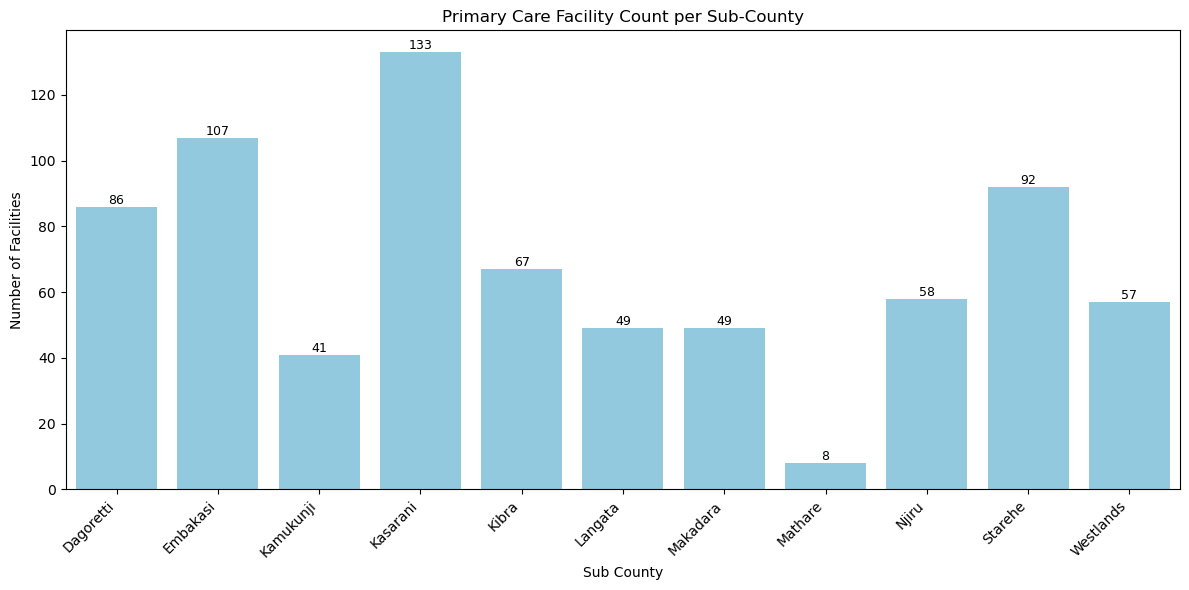

In [322]:
plt.figure(figsize=(12, 6))

# Create bar plot
ax = sns.barplot(data=primary_count, x='Sub County', y='PC Facility Count', color='skyblue')

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Add axis labels and title
plt.xlabel('Sub County')
plt.ylabel('Number of Facilities')
plt.title('Primary Care Facility Count per Sub-County')

# Add data labels on each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',               # label text
                (p.get_x() + p.get_width() / 2, height),  # position
                ha='center', va='bottom', fontsize=9)     # alignment and style

# Improve layout
plt.tight_layout()
plt.show()

**Observation:**

Sub-counties like Kasarani (133), Embakasi (107), and Dagoretti (86) appear to be well-served in terms of the number of facilities.

On the other hand, sub-counties like Mathare (8) and Kamukunji (41) seem to have much lower counts,

**Interpretation:**

But Is Quantity Enough?

While these numbers suggest that some areas are well-covered, they may not be giving compplete information about accessibility to primary healthcare.

- **Affordability:**

Are these facilities affordable for low-income populations, or are most  out of reach financially?

- **Facilities vs. Population:**

Are there enough facilities to serve the population size of each sub-county, especially in high-density informal settlements?

That’s why our next steps go beyond plain counts—to explore who owns these facilities and whether the average resident can actually access and afford care.

### 3. Public vs Private Distribution

Now that we’ve looked at how many primary care facilities exist in Nairobi, the next question is: What is the ownership distribution of these facilities?

Since public facilities are typically more affordable and accessible for low-income groups, this breakdown is crucial in assessing whether the presence of facilities translates to real access.

#### Group by Sub-county and Count Public vs Private Facilities

Group the primary care dataset by Sub County and Ownership label (Public or Private), then count how many facilities fall under each category per Sub County.

In [298]:
# Group by Sub-county and Count Public vs Private Facilities
own_counts = primary_df.groupby(['Sub County','Ownership label']).size().unstack(fill_value=0).reset_index()

# Preview
own_counts

Ownership label,Sub County,Private,Public
0,Dagoretti,76,10
1,Embakasi,95,12
2,Kamukunji,36,5
3,Kasarani,116,17
4,Kibra,51,16
5,Langata,34,15
6,Makadara,37,12
7,Mathare,5,3
8,Njiru,55,3
9,Starehe,74,18


This table gives us a quick glance at how many facilities in each sub-county are public vs private.

#### Plot no. of facilities per sub-county: Public vs Private

This chart shows us not just the total count, but the relative share of public and private facilities in each sub-county. Some areas have high facility counts, but most are privately run.

<Axes: xlabel='Sub County'>

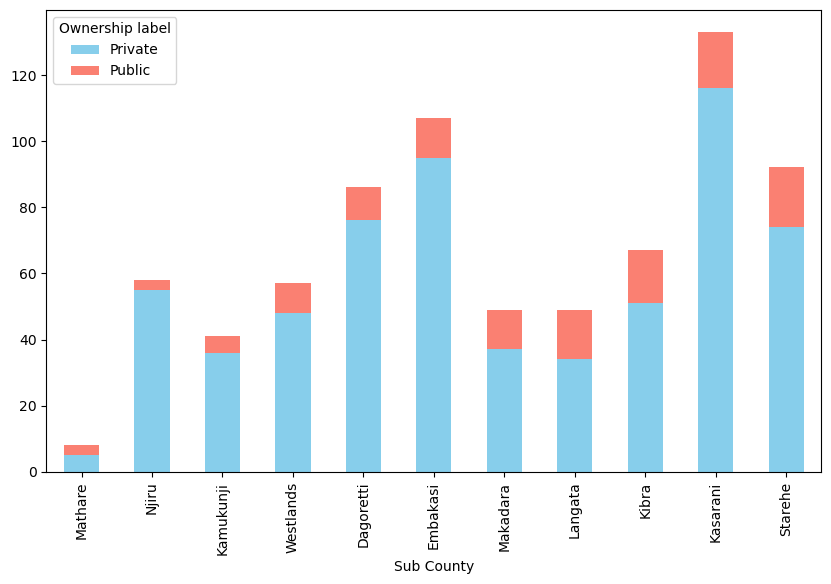

In [299]:
# Sort the sub-counties by the number of public facilities (ascending)
own_counts=own_counts.sort_values(by='Public')

# Plot a stacked bar chart
own_counts.plot(
    kind='bar',
    stacked=True,
    x='Sub County',
    color=['skyblue', 'salmon'],
    figsize=(10,6)
)

#### Calculate % Public Facilities in Each Sub County

This helps us quantify the presence of public care facilities relative to the total.

In [301]:
# Add a new column showing the percentage of public facilities in each sub-county
own_counts['% Public'] = round((own_counts['Public'] / (own_counts['Public'] + own_counts['Private'])) * 100, 0)

# Preview
own_counts

Ownership label,Sub County,Private,Public,% Public
7,Mathare,5,3,38.0
8,Njiru,55,3,5.0
2,Kamukunji,36,5,12.0
10,Westlands,48,9,16.0
0,Dagoretti,76,10,12.0
1,Embakasi,95,12,11.0
6,Makadara,37,12,24.0
5,Langata,34,15,31.0
4,Kibra,51,16,24.0
3,Kasarani,116,17,13.0


#### Plot % of public facilities per sub county

**Note:** This metric should be interpreted with caution. For instance, Mathare shows 38% public ownership, which might seem relatively high—but that’s 38% of only 8 facilities, i.e., just 3 public facilities in total. This view is meant to offer insight into the proportional share of public infrastructure.

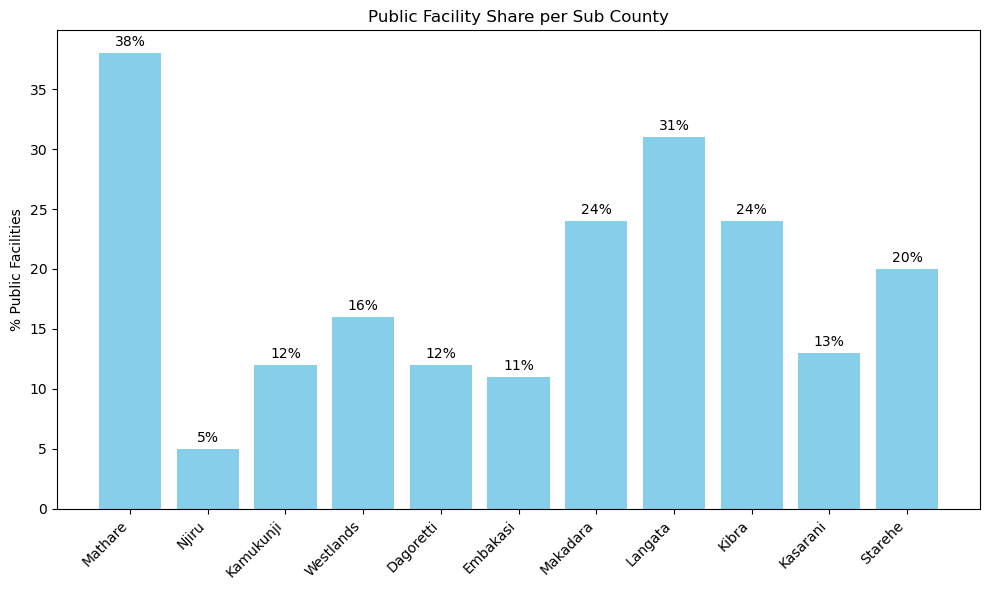

In [304]:
# Plot bar chart
x = own_counts['Sub County']
y = own_counts['% Public']

plt.figure(figsize=(10,6))
bars = plt.bar(x, y, color='skyblue')

# Add labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.0f}%',              # format to 0 decimals
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),                 # vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.ylabel('% Public Facilities')
plt.title('Public Facility Share per Sub County')
plt.tight_layout()
plt.show()

**Observation:**

Even in areas with high numbers of facilities, public facilities are only a small fraction. We see sub counties like Njiru (5%), Embakasi (11%), Kasarani (13%), and Kamukunji (12%) all which have very low public representation.

The highest is only at 38%, Mathare. And when we look closely , this only equates to 3 facilities in total.

**Interpretation:**

Based on our observation, we can conclude that facility count alone is not an adequate measure of availability.

It introduces a question of affordability, especially for low-income populations. Facilities may exist in quantity, but who can actually access them? A high share of private ownership suggests that cost barriers may still exclude a large portion of residents.

### 4. Health Facility Density per Sub-County for Primary Care Access

Earlier, we looked at the number of primary care facilities per sub-county. But is the count alone enough to understand access?

What if some sub-counties have large populations? Does a high facility count necessarily translate to better access?

To answer this, we calculate Health Facility Density (HFD) — the number of primary care facilities per 1,000 people — a more meaningful measure of access that incorporates population need.

#### Merge Population Data

We begin by combining facility counts with population data.

In [306]:
# Clean for consistency 
primary_count['Sub County'] = primary_count['Sub County'].str.strip()
df_population['Sub County'] = df_population['Sub County'].str.strip()

# # Merge facility count and population data
primary_hfd = primary_count.merge(df_population[['Sub County', 'Total']], 
                         on='Sub County', how='left')

primary_hfd

,Sub County,PC Facility Count,Total
0,Dagoretti,86,434208
1,Embakasi,107,988808
2,Kamukunji,41,268276
3,Kasarani,133,780656
4,Kibra,67,185777
5,Langata,49,197489
6,Makadara,49,189536
7,Mathare,8,206564
8,Njiru,58,626482
9,Starehe,92,210423


#### Calculate Health Facility Density (HFD) per 1000 people

We calculate HFD using the formula defined above.

In [307]:
# HFD = (Facilities / Population) * 1000
primary_hfd['HFD_per_1000'] = (primary_hfd['PC Facility Count'] / primary_hfd['Total']) * 1000

# Sort for readability
primary_hfd = primary_hfd.sort_values(by='HFD_per_1000', ascending=False)
primary_hfd

,Sub County,PC Facility Count,Total,HFD_per_1000
9,Starehe,92,210423,0.437215
4,Kibra,67,185777,0.360647
6,Makadara,49,189536,0.258526
5,Langata,49,197489,0.248115
0,Dagoretti,86,434208,0.198062
10,Westlands,57,308854,0.184553
3,Kasarani,133,780656,0.170370
2,Kamukunji,41,268276,0.152828
1,Embakasi,107,988808,0.108211
8,Njiru,58,626482,0.092580


#### Calculate threshold for underserved

We define underserved sub-counties as those below the median HFD. We use median because it better reflects the central tendency without being dragged down by low and high values.

In [311]:
# Calculate median as threshold
mid_hfd = primary_hfd['HFD_per_1000'].median()
mid_hfd

0.18455321932045562

### Plot Facility Density per 1000 People by Sub-County

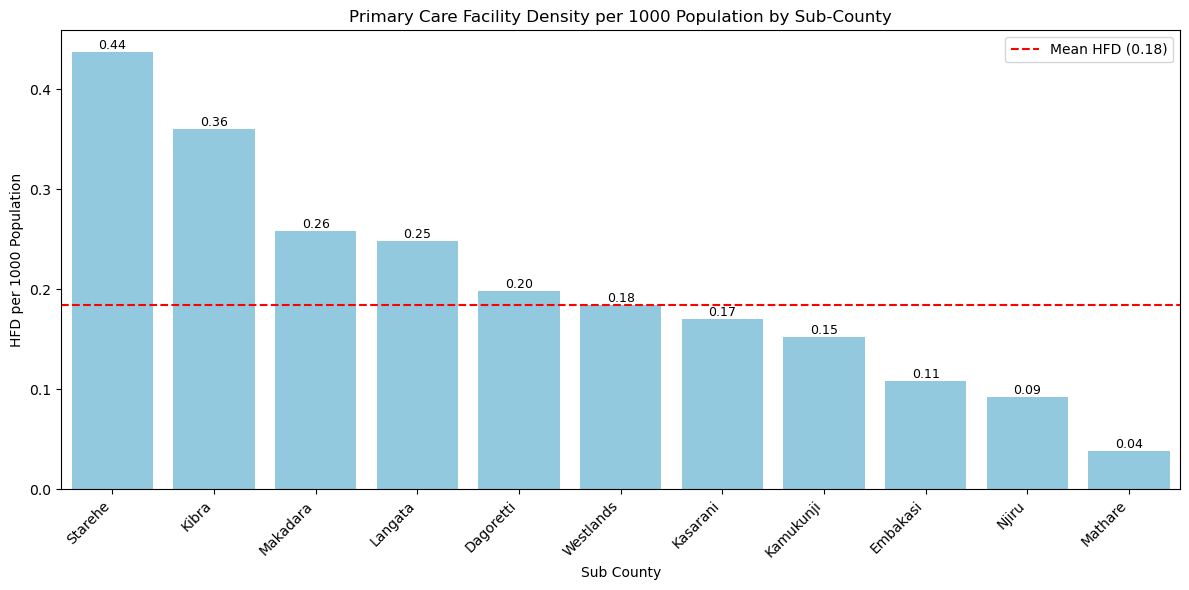

In [324]:
plt.figure(figsize=(12, 6))

# Create barplot for HFD per 1000 population
ax = sns.barplot(x='Sub County', y='HFD_per_1000', data=primary_hfd, color='skyblue')

# Add horizontal line for the mean HFD
plt.axhline(mid_hfd, color='red', linestyle='--', label=f'Mean HFD ({mid_hfd:.2f})')

# Add legend for the mean line
plt.legend()

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Add axis labels and title
plt.xlabel('Sub County')
plt.ylabel('HFD per 1000 Population')
plt.title('Primary Care Facility Density per 1000 Population by Sub-County')

# Add data labels above each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}',                   # label with 2 decimal places
                (p.get_x() + p.get_width() / 2, height),  # x and y coordinates
                ha='center', va='bottom', fontsize=9)     # alignment and style

# Tidy up layout
plt.tight_layout()
plt.show()

**Observation:**

- Kasarani had the highest number of facilities (133), but its HFD is just 0.17, placing it below the median — meaning facilities are stretched across a large population.
- Mathare, with only 8 facilities, has the lowest HFD (0.039) — confirming extremely limited access.
- Embakasi and Njiru, despite higher counts (107 and 58), also fall below the threshold — due to large populations.

**Interpretation:** 

High facility numbers don’t always mean better access — we must consider how those facilities are spread relative to population.
We have five sub-counties falling below the HFD threshold, and are therefore underserved: In order from least served:
- Mathare
- Njiru
- Embakasi
- Kamkunji
- Kasarani

**Note:** Even though Mathare had the highest public share (~38%), this only translated to 3 public facilities out of 8 — insufficient for its population of 206,564. This highlights the need to interpret HFD and % public together, rather than in isolation.

### 5. Comparing % Public Facilities and Health Facility Density

Let's examine whether sub-counties with more public facilities (as a proportion) also tend to have higher primary care facility density (HFD per 1000 people).

#### Merge HFD and % Public into one dataframe

In [317]:
# Merge primary care health facility density (HFD) with % of public facilities
df_combined = pd.merge(primary_hfd[['Sub County','HFD_per_1000']], own_counts[['Sub County','% Public']], on='Sub County')

#Preview
df_combined

,Sub County,HFD_per_1000,% Public
0,Starehe,0.437215,20.0
1,Kibra,0.360647,24.0
2,Makadara,0.258526,24.0
3,Langata,0.248115,31.0
4,Dagoretti,0.198062,12.0
5,Westlands,0.184553,16.0
6,Kasarani,0.170370,13.0
7,Kamukunji,0.152828,12.0
8,Embakasi,0.108211,11.0
9,Njiru,0.092580,5.0


#### Plot: % Public vs Health Facility Density

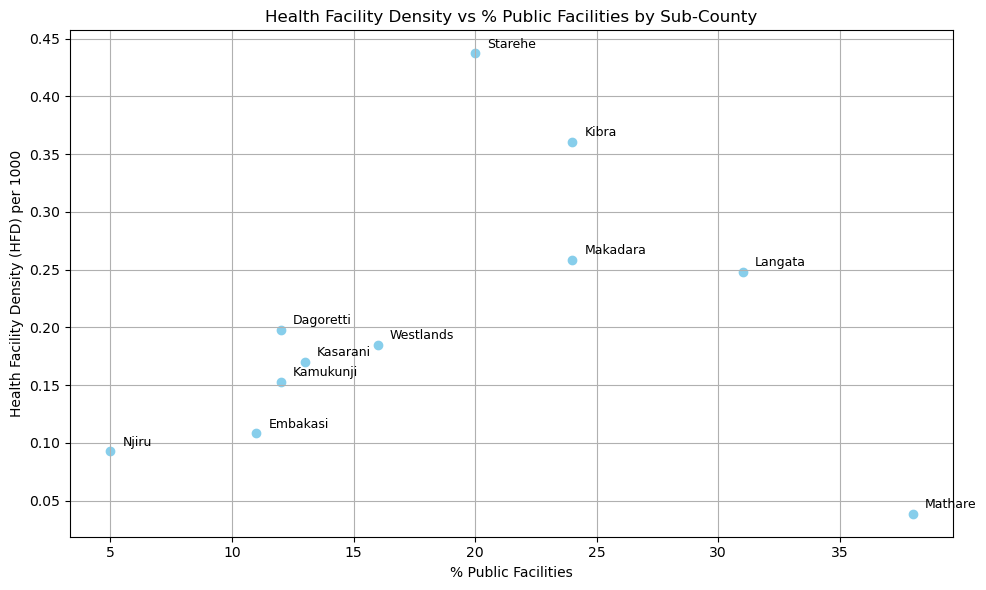

In [314]:
plt.figure(figsize=(10, 6))
plt.scatter(df_combined['% Public'], df_combined['HFD_per_1000'], color='skyblue')

# Add labels
for i, row in df_combined.iterrows():
    plt.text(row['% Public'] + 0.5, row['HFD_per_1000'] + 0.005, row['Sub County'], fontsize=9)

plt.xlabel('% Public Facilities')
plt.ylabel('Health Facility Density (HFD) per 1000')
plt.title('Health Facility Density vs % Public Facilities by Sub-County')
plt.grid(True)
plt.tight_layout()
plt.show()

**Observation:**
	•	No clear linear relationship between % public facilities and health facility density.
	•	Some areas (e.g. Mathare) have a high % public but very low density.
	•	Others (e.g. Starehe) have relatively high density but low public share.

This just gives us a visual overview of each sub-county in terms of:
	1.	How many facilities they have per 1000 (density).
	2.	What share of those are public (affordability).

### 6. Underutilized /Non-Operational Primary Care Facilities per Sub-county

Reviving existing facilities could be a faster and more cost-effective way to expand access — particularly for underserved areas.

#### Filter for Non-Operational Primary Care Facilities

In [319]:
# Filter non-operational primary care facilities
non_op_primary = primary_df[primary_df['Operational Status'].str.lower().str.strip() != 'operational']
non_op_primary.head(2)

,Facility Code,Facility Name,Sub County,Division,Type,Owner,Location,Sub Location,Constituency,Beds,Cots,Open 24 Hours,Open Weekends,Operational Status,Ownership label,Facility level
18,12862,AAR Kariobangi Clinic,Kasarani,kasarani,Medical Clinic,Private Enterprise (Institution),Kasarani,NaN,RUARAKA,0,0,N,N,Not-Operational,Private,Primary Care
109,17934,Baraka Medical Centre,Kasarani,kasarani,Dispensary,Kenya Episcopal Conference-Catholic Secretariat,Ruaraka,Utalii,RUARAKA,0,0,N,N,Not-Operational,Private,Primary Care


#### Count Non-Operational Facilities per Sub-county

In [320]:
# Count non-operational primary care facilities per Sub County
non_op_counts = non_op_primary.groupby('Sub County').size().reset_index(name='Non-Operational Primary Facilities')

# Sort for readability
non_op_counts = non_op_counts.sort_values(by='Non-Operational Primary Facilities', ascending=False)
non_op_counts

,Sub County,Non-Operational Primary Facilities
1,Kasarani,6
4,Makadara,4
0,Embakasi,3
2,Kibra,3
5,Njiru,3
3,Langata,1
6,Westlands,1


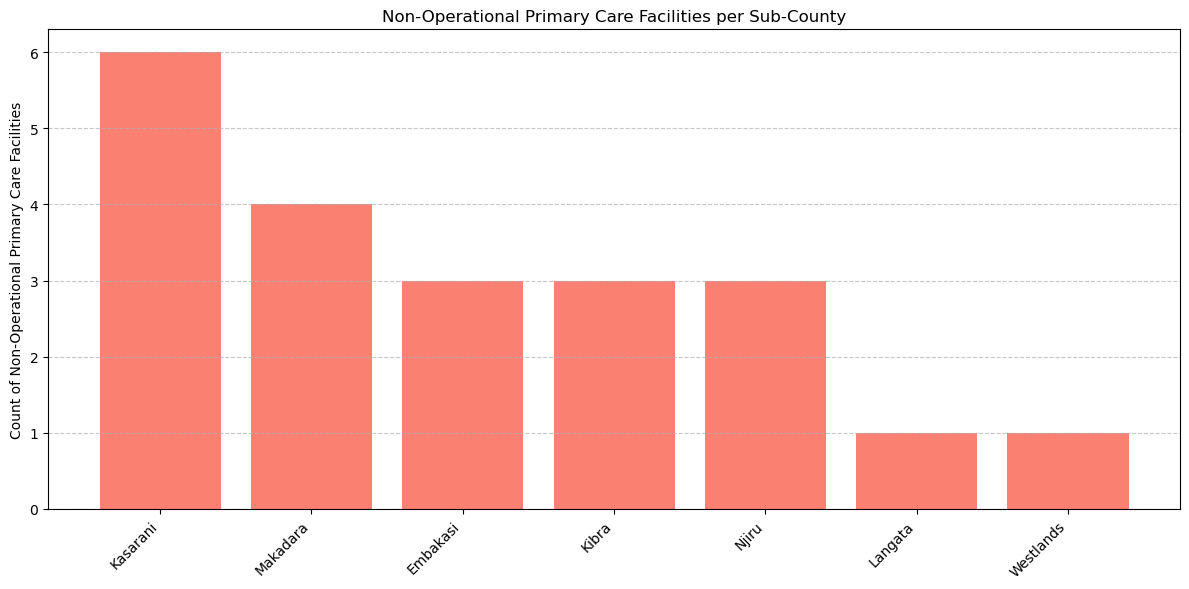

In [321]:
# Plot non-operational primary care facilities per sub-county
plt.figure(figsize=(12, 6))
plt.bar(non_op_counts['Sub County'], non_op_counts['Non-Operational Primary Facilities'], color='salmon')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count of Non-Operational Primary Care Facilities')
plt.title('Non-Operational Primary Care Facilities per Sub-County')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Observation:**

Some sub-counties already flagged as underserved — like Kasarani, Embakasi, and Njiru — also contain a notable number of non-operational primary care facilities.

**Interpretation:**

Rather than building entirely new facilities, Nairobi County could start by:
- Investigating the reasons for dormancy and if infratsructure stille exists
- Evaluating potential for renovation or reopening
- Prioritizing revival in underserved areas.

## Recommendations

Following the insights we have derived above, Nairobi County can use the following approaches to improve access to primary healthcare in Nairobi:

**1. Leverage Private Infrastructure for Immediate Affordability Relief:**
- Even in sub-counties with above average facility density, access remains skewed due to high private ownership and potential cost barriers.
- The government can therefore leverage the existing private infrastructure to provide affordability relief such as:
	•	Introduce subsidies for primary care at private facilities, especially for low-income groups.
	•	Explore Public-Private Partnerships (PPPs) to contract private clinics for affordable public service delivery.

> This mitigates financial access barriers in the short term while larger infrastructure gaps are being addressed.


**2. Prioritize Underserved Sub-Counties for New Facilities:**
- Based on our Health Facility Density analysis, the most underserved sub-counties are:
	•	Mathare
	•	Njiru
	•	Embakasi
- The government can prioritize building new primary care facilities in these sub counties in priority level of most underserved.
	•	Use division-level facility data and population estimates to identify high-need zones within these sub-counties.

>This ensures new builds are targeted and better planned.

**3. Revive Non-Operational Facilities Where Feasible:**
- Several sub-counties with low HFD still have dormant primary care facilities.
- Investigate the causes of non-operation (e.g., staffing shortages, infrastructure issues).
- Assess whether these facilities can be reactivated or upgraded.

> Revitalizing existing infrastructure may offer a faster, lower-cost way to increase capacity — especially in high-need zones.

## Next Steps

**1. Zoom in on Underserved Sub-Counties:**
- Focus on Mathare, Njiru, and Embakasi, previously identified as the most underserved by Health Facility Density (HFD).
- Drill down to the division or location level within these sub-counties to:
- Identify gaps in physical proximity to primary care.
- Guide site selection for new or revitalized facilities.
- Note: Significant data cleaning is required due to inconsistent naming across location fields (e.g., spelling variations and missing entries).

**2. Expand Analysis to Secondary Care (Level 3 & 4):**
- Evaluate distribution of Level 3 and 4 facilities (secondary care providers offering inpatient, emergency, and referral services).
- Compute bed-to-population ratios to assess adequacy of inpatient capacity per sub-county.
- Identify sub-counties without a single secondary-level facility, or with disproportionately low bed counts.

**3. Assess Access to Maternal Health Services:**
- Filter facilities offering maternity services, using:
- Assess availability of maternity centers, maternity beds, and cots.
- Compare with population of women.
- If available, incorporate maternal mortality data (e.g., by location) to prioritize areas with high maternal risk.
- Explore calculating maternity service density: number of maternity centers per 10,000 women.

**4. Evaluate Access to Specialized Services:**
- Identify facilities offering specialized services.
- Map service availability across sub-counties to detect gaps in advanced care access.
- Analyze alignment of service distribution with population health needs (if such health burden data is available).

**5. Filter by Operational Status & Hours:**
- Analyze facility distribution filtered to only those currently operational.
- Further filter by 24-hour access to identify:
- Gaps in emergency care availability.
- Regions where residents lack round-the-clock access to critical services.

## Conclusion

This analysis provides a strategic starting point for improving access to primary healthcare in Nairobi.

It challenges the assumption that “more facilities = more access,” by highlighting how population needs and affordability inform true access.

By identifying underserved sub-counties and differentiating between structural gaps and financial barriers, the analysis offers actionable direction for public investment and private sector leverage.

With the recommended next steps, further phases of analysis can extend this work to secondary care — including inpatient services, maternal care, and specialized treatment — ensuring a comprehensive, data-driven approach to healthcare planning across Nairobi.